# Build plots to be used in the Dash app

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Connect Javascript to display the plots in the notebook
init_notebook_mode(connected=True)

In [33]:
from src.visualization.utils import palette
LOCATION_METADATA = pd.read_csv(f'../data/raw/gbd_location_metadata.csv')

In [26]:
df = pd.read_csv(f'../data/raw/IHME_GBD_2017_HEALTH_SDG_1990_2030_SCALED_Y2018M11D08.csv')
data = df.query('year_id == 2017')
assert data.duplicated(['location_id', 'indicator_id']).sum() == 0
data = data.pivot(index='location_id', columns='indicator_short', values='scaled_value')
data.head()

indicator_short,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,Child Sex Abuse,Child Stunting,Child Wasting,Conflict Mort,Disaster Mort,...,Sexual Violence,Skilled Birth Attend,Smoking Prev,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water
location_id,,,,,,,,,,,,,,,,,,,,,
6,80.0,38.6,60.5,78.7,65.3,76.2,83.9,93.0,100.0,67.6,...,0.0,98.4,41.3,61.7,53.6,78.7,63.5,88.1,73.8,79.2
7,100.0,18.5,77.9,0.0,92.7,81.8,58.7,73.3,100.0,100.0,...,0.0,87.4,52.5,43.7,32.3,54.8,48.4,70.8,58.8,89.4
8,99.8,62.6,58.9,90.5,22.9,80.7,89.9,94.8,100.0,76.6,...,0.0,99.7,58.0,34.7,60.6,87.9,85.7,85.2,78.8,95.5
10,36.8,21.4,44.9,0.0,98.5,60.5,32.5,53.2,72.5,100.0,...,82.0,92.6,48.9,81.6,23.8,50.6,40.5,78.0,28.6,53.1
11,49.3,39.1,97.5,0.0,71.0,78.5,40.7,30.3,69.0,67.6,...,89.6,85.0,20.6,97.4,27.0,50.4,45.1,43.3,21.1,58.6


In [35]:
loc_id = 6
n_neighbors = 4

l_data = data.loc[loc_id]

similarity = np.abs(data ** 2 - l_data ** 2).sum(axis=1).sort_values()
idx_similar = similarity[:n_neighbors + 1].index
df_similar = data.loc[idx_similar]
dif_similar = (df_similar - l_data).reset_index().melt(id_vars='location_id')
dif_similar = pd.merge(dif_similar, LOCATION_METADATA)
dif_similar.head()

,location_id,indicator_short,value,ihme_loc_id,location_name
0,6,Adol Birth Rate,0.0,CHN,China
1,6,Air Poll Mort,0.0,CHN,China
2,6,Alcohol Use,0.0,CHN,China
3,6,Cert Death Reg,0.0,CHN,China
4,6,Child Overweight,0.0,CHN,China


In [55]:
data = [
            go.Scatter(
                x=dif_similar[dif_similar['location_id'] == i]['value'],
                y=dif_similar[dif_similar['location_id'] == i]['indicator_short'],
                text=dif_similar[dif_similar['location_id'] == i]['location_name'],
                mode='markers',
                opacity=0.7,
                marker={
                    'size': 10,
                    # 'color': dif_similar[dif_similar['cluster'] == i]['color'],  # palette[i],
                    'line': {'width': 0.5, 'color': 'white'}
                },
                name=f'Location {i}'
            ) for i in dif_similar.location_id.unique()
        ]
layout = go.Layout(
            title=f'Difference between {loc_id} and similar countries',
            xaxis={'title': 'Index Value'},
#             yaxis={'title': 'test'},
             height=1000,
            margin={'l': 120, 'b': 40, 't': 40, 'r': 0},
            # legend={'x': 0, 'y': 1},
            hovermode='closest')
fig = dict(data=data, layout=layout)

# iplot(data)
iplot(fig)

In [23]:
df = pd.read_csv('../models/data_clustered.csv')

df_c = df.drop('location_id', axis=1).groupby('cluster').mean().reset_index().melt(id_vars='cluster')
available_indicators = df.columns.tolist()

colorscale = [[k/(len(palette)-1), palette[k]] for k in palette.keys()]  #choropleth colorscale seems to need 0-1 range
df['color'] = df.cluster.map(palette)
df_c['color'] = df_c.cluster.map(palette)

In [24]:
df.head()

,location_id,ihme_loc_id,location_name,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,Child Sex Abuse,Child Stunting,...,Smoking Prev,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water,cluster,color
0,33,ARM,Armenia,52.4,41.1,63.0,97.4,20.3,100.0,80.2,...,38.1,55.8,63.2,71.8,68.9,95.8,76.4,96.6,4,#00ffff
1,34,AZE,Azerbaijan,36.6,34.9,52.6,86.3,18.8,100.0,74.8,...,42.8,86.3,41.8,60.8,37.9,72.3,58.2,88.3,4,#00ffff
2,35,GEO,Georgia,35.2,37.9,43.9,66.3,18.0,100.0,81.6,...,35.9,60.0,49.4,64.7,65.4,84.6,75.6,88.9,4,#00ffff
3,36,KAZ,Kazakhstan,47.0,51.3,29.6,88.3,38.6,96.0,84.1,...,39.6,12.0,48.0,67.6,59.6,66.9,72.8,88.6,4,#00ffff
4,37,KGZ,Kyrgyzstan,40.6,39.7,51.6,97.6,65.9,100.0,73.1,...,52.1,47.6,40.0,60.7,51.2,72.7,60.5,81.9,4,#00ffff


In [10]:
df_c.head()

,cluster,variable,value,color
0,0,Adol Birth Rate,57.863158,#ff0000
1,1,Adol Birth Rate,36.766667,#ff8000
2,2,Adol Birth Rate,82.572973,#ffff00
3,3,Adol Birth Rate,29.175000,#40ff00
4,4,Adol Birth Rate,51.194737,#00ffff


In [13]:
data = [
            go.Scatter(
                x=df_c[df_c['cluster'] == i]['value'],
                y=df_c[df_c['cluster'] == i]['variable'],
                text=str(i),  # df[df['cluster'] == i]['location_name'],
                mode='markers',
                opacity=0.7,
                marker={
                    'size': 10,
                    'color': df_c[df_c['cluster'] == i]['color'],  # palette[i],
                    'line': {'width': 0.5, 'color': 'white'}
                },
                name=f'Cluster {i}'
            ) for i in df_c.cluster.unique()
        ]
layout = go.Layout(
            title='SDG Indicator Index by Cluster',
            xaxis={'title': 'Index Value'},
#             yaxis={'title': 'test'},
            margin={'l': 120, 'b': 40, 't': 40, 'r': 0},
            # legend={'x': 0, 'y': 1},
            hovermode='closest')
fig = dict(data=data, layout=layout)

# iplot(data)
iplot(fig)

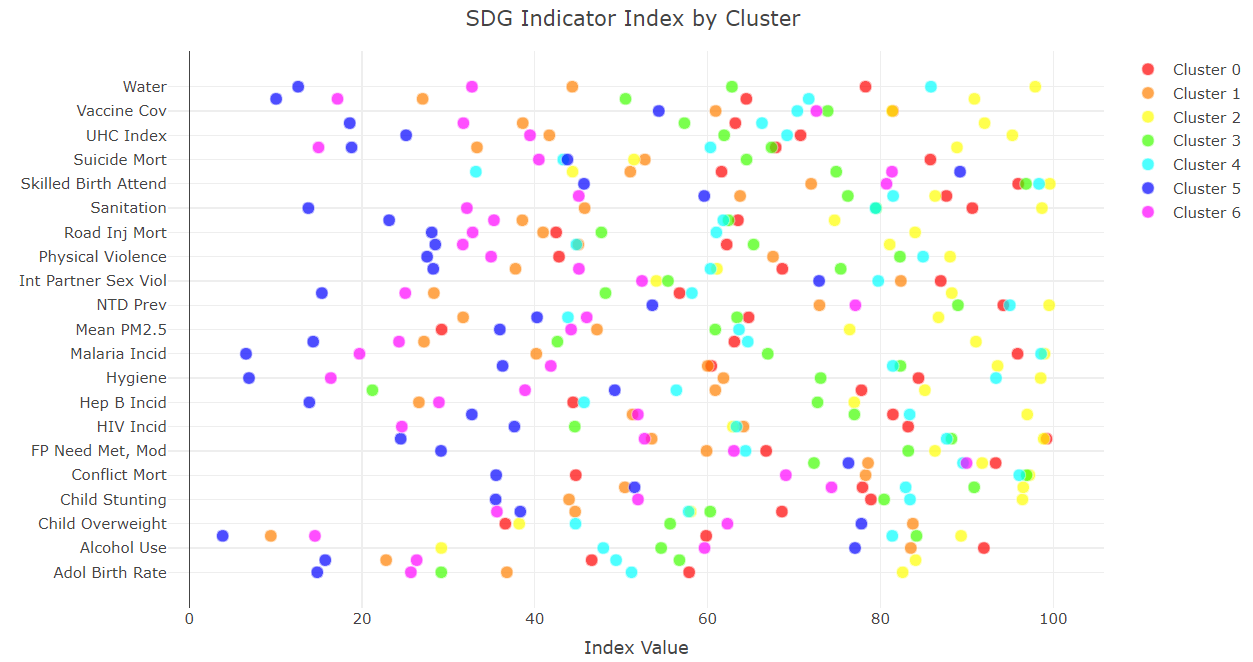

In [ ]:
## What about a time series of all indicators for a given country

In [18]:
df = pd.read_csv(f'../data/raw/IHME_GBD_2017_HEALTH_SDG_1990_2030_SCALED_Y2018M11D08.csv')
df.head()

,location_id,location_name,year_id,estimate_type,indicator_id,indicator_short,ihme_indicator_description,indicator_outline,indicator_unit,target_description,goal_description,scaled_value,scaled_lower,scaled_upper
0,6,China,1990,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,84.6,77.0,89.2
1,6,China,1991,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,82.5,76.0,86.5
2,6,China,1992,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,80.9,75.2,84.6
3,6,China,1993,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,80.5,75.6,84.2
4,6,China,1994,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,78.4,73.2,82.4


In [14]:
loc_id = 6

In [22]:
dff = df[df['location_id'] == loc_id]

data = [
            go.Scatter(
                x=dff[dff['ihme_indicator_description'] == i]['year_id'],
                y=dff[dff['ihme_indicator_description'] == i]['scaled_value'],
                text=str(i),  # df[df['cluster'] == i]['location_name'],
                mode='lines',
                opacity=0.7,
                marker={
                    'size': 5,
                    # 'color': df_c[df_c['cluster'] == i]['color'],  # palette[i],
                    # 'line': {'width': 0.5, 'color': 'white'}
                },
                name=f'{i}'
            ) for i in dff['ihme_indicator_description'].unique()
        ]
layout = go.Layout(
            title=f'SDG Indicators for {loc_id}',
            # xaxis={'title': 'Index Value'},
#             yaxis={'title': 'test'},
            margin={'l': 120, 'b': 40, 't': 40, 'r': 0},
            showlegend=False,
            # legend={'x': 0, 'y': 1},
            hovermode='closest')
fig = dict(data=data, layout=layout)

# iplot(data)
iplot(fig)